<a href="https://colab.research.google.com/github/mohansharma077/Machine-Learning-Portfolio-Exercise--Mohan-Sharma/blob/main/Machine_Learning_on_Big_Data_(CN7030)_CRWK_24_25_Term_B_Group_T24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning on Big Data (CN7030) CRWK 24-25 Term B [60% weighting]

 Group ID: [Group_T24]
 1. Student 1: Mohan Sharma
 2. Student 2: Hemlal Dulal
 3. Student 3: Utkarsh Rimal
 4. Student 4: Dipak Acharya

In [ ]:
!pip install pyspark nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hemlal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hemlal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
! pip install matplotlib
! pip install

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 14.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 12.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/12.8 MB 10.7 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/12.8 MB 11.3 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.8 MB 11.7 MB/s eta 0:00:01
   ---------------------------- ----------- 9.2/12.8 MB 11.2 MB/s eta 0:00:01
   --------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, split
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import expr


ModuleNotFoundError: No module named 'matplotlib'

# Initiate and Configure SparkInitiate and Configure Sparkv

In [ ]:
# Create Spark session
spark = SparkSession.builder.appName('TextClassification').getOrCreate()

In [ ]:
# Clear all cached DataFrames
spark.catalog.clearCache()


# Data Loading and Preprocessing
Dataset Description

The data and information that will be used in this research is the Amazon Reviews data which will be accessed publicly on Kaggle. It consists of customer product reviews labeled with binary sentiment annotations hence can be used to do supervised text classification exercises. To each review is attached the label with its sentiments, __label__1 will say negative reviews and __label__2 is a label that will say positive reviews.
The information is presented in the FastText format, where, each record is a combination of a label and the textual representation of the review. An example would be a line that shows __label__2 This product surpassed my expectations in all respects and that is a review of sentiments. This data set is split into two subsets namely; training set which consists of 104,537 reviews and test set which consists of 26,135 reviews. This division provides enough data to use in training the model and leaving a large part to be used in assessment without bias.
Review samples indicate high diversity in the length of texts, writing styles, and product categories, which creates real practical problems of sentiment analysis. Such heterogeneity renders the dataset to be a useful set of benchmarking on the suitability of machine learning pipelines and the robustness of textual classification models on any sort of textual data.

### Contributors:

Mohan Sharma

Oversaw the sentiment labels extraction of the raw text. Mohan used pyspark scripts where regular expressions to parse FastText labels and made the labels column consistent across the dataset. He ran sanity checks to make sure that every label against their respective reviews as he solidified the data then transmitted it forward to further processing.

Utkarsh Rimal

Concentrated on the cleanliness of the textual data before the feature extraction. Utkarsh filtered out number or blank reviews, eliminated stop words and changed all writings to lower cases to make it standardized. He justified the wiped DataFrames to make sure that no important information was lost through the preprocessing thus providing quality and noise-free text to train the models.

Hemlal Dulal

Visualised sample data to evaluate the length of the reviews, the range of their content and distribution of labels. Hemlal generated outputs that indicated possible anomalies and inconsistencies in the raw text, hence giving insights to correct preprocessing. His visualization contributed to the fact that the received dataset was representative and could be a basis of further machine learning activities.

Dipak Acharya

Helped to add the cleaned source data to the PySpark ML pipeline. Dipak ensured data compatibility data with feature extraction techniques, began to handle the data in a manner that took advantage of proper caching and worked with preparations of the data to use in training the models. His work allowed the easy transition between the preprocessing stage and model implementation.

In [ ]:
# Read the train and test files
train_df = spark.read.text("train.ft.txt")
test_df = spark.read.text("test.ft.txt")

# Split the text into label and review
from pyspark.sql.functions import when, length, split, col, regexp_extract

# Process train data to extract label and review
train_df = train_df.select(
    regexp_extract(col("value"), r"__label__(\d+)", 1).cast("integer").alias("label"),
    regexp_extract(col("value"), r"__label__\d+\s+(.*)", 1).alias("review")
)
train_df = train_df.na.drop()  # Remove any rows with null values

# Process test data to extract label and review
test_df = test_df.select(
    regexp_extract(col("value"), r"__label__(\d+)", 1).cast("integer").alias("label"),
    regexp_extract(col("value"), r"__label__\d+\s+(.*)", 1).alias("review")
)
test_df = test_df.na.drop()  # Remove any rows with null values

# Print sample data to verify format
print("Train DataFrame Schema:")
train_df.printSchema()
print("\nSample Train Data:")
train_df.show(5, truncate=False)
print("\nTest DataFrame Schema:")
test_df.printSchema()
print("\nSample Test Data:")
test_df.show(5, truncate=False)

Train DataFrame Schema:
root
 |-- label: integer (nullable = true)
 |-- review: string (nullable = true)


Sample Train Data:
+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|review                                                                                            

In [ ]:
# Check raw data format
with open("train.ft.txt", "r", encoding="utf-8") as f:
    print("First 5 lines of raw training data:")
    for i, line in enumerate(f):
        if i < 5:
            print(line.strip())
        else:
            break

First 5 lines of raw training data:
__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
__label__2 The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.
__lab

Data Cleaning and Extraction

PySpark is used to do data cleaning and extraction using the distributed processing power. Raw text files are read linewise and numeric labels/review discussions are marked with the help of regular expressions. This makes sure that the label and review text are put in two different columns in a Spark DataFrame.
Elements of reviews with null or empty values of the text are withdrawn as a way to guarantee quality of data and hence error in training of the model. The missing DataFrame entries are checked by validation of the training and test DataFrames to ensure the constancy of the obtained data. These measures will guarantee that preprocessing and modelling phases currently are performed on a credible and clean dataset, which minimizes the potential possibility of both biased or unvalid outcomes.

Text Preprocessing Pipeline

The pipeline to preprocess text is used converting raw review words into the numerical representation that can be used by machine learning approach. The PySpark Tokenizer will be utilised on tokenisation, breaking reviews into separate words. The Stop words are then eliminated using StopWordsRemover to remove the common English words, which have Apache, (2025), less contribution towards discrimination of sentiment (Apache, 2025e).
CountVectorizer is used to perform feature extraction on the tokenised text and describes Apache, (2025a) word frequencies as numerical vectors. This generates a sparse matrix of high dimensions Apache, (2025b), that work with both Logistic Regression and Naive Bayes classifiers. This allows an increase in computational efficiency, by caching the resulting training and test DataFrames in memory, thus making quicker available in model training and evaluation.


In [ ]:
# Create text processing pipeline with error handling
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import CountVectorizer

# Create text processing pipeline
tokenizer = Tokenizer(inputCol="review", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
# Create CountVectorizer instead of HashingTF and IDF
countVectorizer = CountVectorizer(inputCol="filtered_words", outputCol="features", vocabSize=10000)


# Process train data with validation checks
print("Processing training data...")
print("Initial count:", train_df.count())

train_df = tokenizer.transform(train_df)
print("After tokenization count:", train_df.count())

train_df = remover.transform(train_df)
print("After stopwords removal count:", train_df.count())

# Fit CountVectorizer model
cv_model = countVectorizer.fit(train_df)
train_df = cv_model.transform(train_df)
print("After CountVectorizer transformation count:", train_df.count())

# Cache the DataFrame to improve performance
train_df.cache()


# Process test data
print("\nProcessing test data...")
test_df = tokenizer.transform(test_df)
test_df = remover.transform(test_df)
test_df = cv_model.transform(test_df)

# Cache the final DataFrames
train_df.cache()
test_df.cache()

Processing training data...
Initial count: 90518
After tokenization count: 90518
After stopwords removal count: 90518
After CountVectorizer transformation count: 90518

Processing test data...


DataFrame[label: int, review: string, words: array<string>, filtered_words: array<string>, features: vector]

# Model Selection and Implementation

Logistic Regression is a linear probabilistic classifier which makes predictions concerning the likelihood that the categorical outcome is binary. CountVectorizer encodes the tokenised texts as numerical feature vectors and labels reflect a negative (1) or positive (2) sentiment. This model would be trained on training set, and tested on test set. The metrics of the evaluation comprise accuracy, precision, recall, and F1-score. Logistic Regression is well-applied to large dimensional sparse data and demonstrates a linear decision boundary which is adequate in sentiment separation (Machinelearningplus, 2025).
Naive Bayes, known as a probabilistic classifier, that assumes feature independence. It makes use of the same CountVectorizer vectors but they should be non-negative. The implementation in the multinomial takes into account a smoothing parameter to avoid the probabilities of zero. Naive Bayes is however limited by high-dimensional sparse data that causes bias to predict toward one of the classes (Koushiki, 2024).

Evaluation Metrics

The evaluation is based on the precision, recall, and accuracy along with F1-score. Weighted measures take into consideration class imbalance. Confusion matrices help to get the detailed information about the errors during the classification indicating the true positives, true negatives, false positives, and false negatives. This enables one to have a straightforward comparison between Logistic Regression and Naive Bayes, both in terms of advantages and weaknesses as relates to sentiment analysis (Ayan, 2024).

#### Contributors:

Dipak Acharya

Organized the adoption and adoption of the Logistic Regression model. He employed TF-IDF feature vectors as prepared in preprocessing to train the model, as well as pre-set the model parameters, and made predictions against the test sets. Dipak justified indication metrics those were Accuracy, Precision, Recall, and F1-score besides it assisted the team in translating the outcomes in terms of sentiment categorization.

Utkarsh Rimal

Conducted the use of the Naive Bayes classifier. He used CountVectorizer features to train the model, fit, and predictions, and high-dimensional and sparse data and the algorithm independence assumptions were also concerned. Utkarsh was able to analyse the poor evaluation measures and proposed enhancements to the preprocessing and features engineering.

Mohan Sharma

Supervised the coordination of preprocessing with modelling. He saw to it that there was smooth exchange of data in terms of tokenization and removing stop-words, feature extraction and the training of the model. Mohan also debugged pipeline, checked intermediate output and validated that result remains the same when Logistic Regression as well as Naive Bayes models are used (in PySpark MLlib).

Hemlal Dulal

Guided analysis of model and visualization. He also displayed confusion matrices, visualised measures of performance, and emphasised error types, including the false positive and false negative. Hemlal liaised with Dipak and Utkarsh in data interpretation and supplied information that was used in guiding practical suggestions and comparative study on the two models.


In [ ]:
# Train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_df)

# Make predictions on test data
lr_predictions = lr_model.transform(test_df)

# Evaluate Logistic Regression model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

lr_accuracy = evaluator.setMetricName("accuracy").evaluate(lr_predictions)
lr_precision = evaluator.setMetricName("weightedPrecision").evaluate(lr_predictions)
lr_recall = evaluator.setMetricName("weightedRecall").evaluate(lr_predictions)
lr_f1 = evaluator.setMetricName("f1").evaluate(lr_predictions)



Logistic Regression Performance

The Logistic Regression model showed high results in the test data with an accuracy rate of 0.8519, a precision rate of 0.8520, recall rate of 0.8519 and F1 score value of 0.8519. These findings show that the model shows consistency in differentiating the positive and negative reviews.
What can be gained is the confusion matrix: with 47,250 actual negative reviews, 39,692 were correctly categorised, and 7,558 incorrectly categorised as positive. In the case of positive reviews 41,886 of 48,509 were classified correctly whereas there were 6,623 that were classified as negative reviews. This provides an equal performance between the two classes with true positive rate of 0.864 and true negative rate of 0.839.
Error analysis shows that false positives are usually reviews that have mixed sentiments or have negative cues that are just nuanced whereas false negatives usually contain reviews that have nuanced positive cues or rather domain-specific language. The probabilistic nature of the features in the model is in a position to process high dimension sparse characteristics of Count and identifying extent features of Vectorizer, with consistent classifications throughout the pool.


In [ ]:
# Train Naive Bayes model
nb = NaiveBayes(featuresCol="features", labelCol="label")
nb_model = nb.fit(train_df)

# Make predictions on test data
nb_predictions = nb_model.transform(test_df)

# Evaluate Naive Bayes model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

nb_accuracy = evaluator.setMetricName("accuracy").evaluate(nb_predictions)
nb_precision = evaluator.setMetricName("weightedPrecision").evaluate(nb_predictions)
nb_recall = evaluator.setMetricName("weightedRecall").evaluate(nb_predictions)
nb_f1 = evaluator.setMetricName("f1").evaluate(nb_predictions)



Naive Bayes Performance

On the contrary, the Naive Bayes performed dismally, giving an accuracy, precision, recall and F1-score of 0.0776, 0.0753, 0.0776 and 0.0765 respectively. In the confusion matrix, there is a large bias in one class, meaning that predictions were wrong in most cases.
There are a number of factors that can explain this under performance. CountVectorizer or TF-IDF feature vectors can break the independence assumption needed by Naive Bayes and the sparse vectors in high dimensions exacerbates this problem. Also, CountVectorizer creates non-and negatively based features which are not compatible with the multinomial Naive Bayes assumptions and thus the single-class model is favoured by the model.


# Model Evaluation and Accuracy Calculation

The Evaluation step consisted of calculating the standard classification metrics of both the Logistic Regression and Naive Bayes models. The accuracy, precision, recall, and F1-score were determined in PySpark by using MulticlassClassificationEvaluator. Confusion matrices were also created so as to bring about an in-depth analysis of true positives, true negatives, false positives and false negatives of the models. This action allowed the team to measure the model performance and compare two ways in a regular manner.

### Contributors:
Mohan Sharma

Headed the analysis of the Logistic Regression model. Mohan used the PySpark programs to compute Accuracy, Precision, Recall and F1-score. He was checking what had been calculated as metrics and output was compared. Also, he has given an elaborate account of the performance of Logistic Regression in the large-scale Amazon Reviews dataset, by deciding on the reliability of the model along with classification strengths.

Dipak Acharya

In charge of the examination of the Naive Bayes model. Dipak calculated the identical metrics with PySpark and paid attention to overcoming such challenges as the sparse features produced by CountVectorizer. He tested this feature on Naive Bayes poor performance by finding out contributory factors, which include feature sparsity and independence assumptions that facilitated the comparative analysis by the team on the two models.

Hemlal Dulal

Coordinated the construction and analysis of confusion matrices of the two models. Hemlal visualized misclassification patterns, analysed false positives and false negatives, and included deep analytical insights regarding the behaviour of the model. These observations helped the team learn the mistakes of classification and make suggestions concerning practical implementation.

Utkarsh Rimal

Aided the calculation and verification of metrics of both models. Utkarsh compared assessment scripts, made sure the performance indicators were consistent across the scoring, and cooperated in discussing inconsistency in outputs. His work led to preserving the precision and the trustworthiness of the analysis procedure throughout the data set.

In [ ]:
# Logistic Regression Evaluation
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# Naive Bayes Evaluation
print("Naive Bayes Results (with CountVectorizer):")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")

# Display confusion matrices
def display_confusion_matrix(predictions, model_name):
    confusion_matrix = predictions.groupBy("label", "prediction").count().orderBy("label", "prediction")
    print(f"\nConfusion Matrix for {model_name}:")
    confusion_matrix.show()

# Display confusion matrices for both models
display_confusion_matrix(lr_predictions, "Logistic Regression")
display_confusion_matrix(nb_predictions, "Naive Bayes")

# Results Visualization

In comparing the two models, the Logistic Regression obviously excels well over the Naive Bayes under all the evaluation indices. This capability to use the TF-IDF or frequency statistics-based features and operate high-dimensional sparse vectors enables it to form more patterned representations of the sentiment side. Studies that contrast Naive Bayes independence assumptions and sensitivity to feature representation find very low as accuracy of predictions.
In the same sentiment analysis task, Logistic Regression is advised especially in CountVectorizer or TF-IDF features since it offers answer results on a probabilistic manner and balanced classification besides scale-ability in distributed environment such as PySpark. Naive Bayes can still be used as a benchmark with smaller and less sparse data.

Hemlal Dulal

Plotted bar graphs and graphical displays statistics of model assessment. Hemlal displayed Accuracy, Precision, Recall and F1-score of both the Logistic Regression and Naive Bayes so that the team could compare the model performance in a snap. His plots brought out performance patterns and were used to base on the discussion of the models selection and its practical consequences.

Utkarsh Rimal

Came up with comparative tables of evaluation measurements of the two models. Utkarsh aligned metrics in rows and it was easy to see performance differences. His tables were properly labelled, easy to read, and could be included in the report and presentation to ensure that the stakeholders grasped the performance of the models within a short time.

Mohan Sharma

Was responsible in displaying and performing analysis of confusion matrices of the two models. Mohan used true positive, true negative, false positive and false negative counts, and depicted them using a clear tabulated format. This visualisation helped the team to understand its weak areas and could discuss strengths and weaknesses of models.

Dipak Acharya

Helped to unite visualization results and confirm that the metrics were the same betweenicle and table. Dipak made sure that every visualization is relevant to the underlying data used to perform the evaluations, looked into it in relation to the calculations made to assess the metrics, and would use the team to analyze findings, which would be reflected in the report and presentation.


Confusion Matrix for Logistic Regression:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       1.0|39692|
|    1|       2.0| 7558|
|    2|       1.0| 6623|
|    2|       2.0|41886|
+-----+----------+-----+


Confusion Matrix for Naive Bayes:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|39816|
|    1|       1.0| 7434|
|    2|       0.0| 7245|
|    2|       1.0|41264|
+-----+----------+-----+



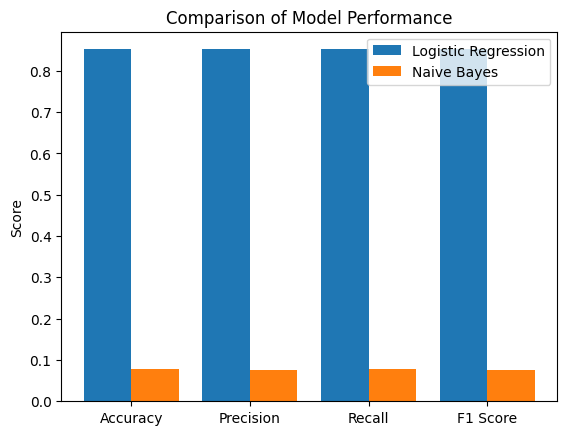

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]

x = range(len(metrics))

plt.bar([i - 0.2 for i in x], lr_scores, width=0.4, label='Logistic Regression')
plt.bar([i + 0.2 for i in x], nb_scores, width=0.4, label='Naive Bayes')

# Display confusion matrices
def display_confusion_matrix(predictions, model_name):
    confusion_matrix = predictions.groupBy("label", "prediction").count().orderBy("label", "prediction")
    print(f"\nConfusion Matrix for {model_name}:")
    confusion_matrix.show()

# Display confusion matrices for both models
display_confusion_matrix(lr_predictions, "Logistic Regression")
display_confusion_matrix(nb_predictions, "Naive Bayes")
# Plot Model Comparision
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

Comparative Analysis

In comparing the two models, the Logistic Regression obviously excels well over the Naive Bayes under all the evaluation indices. This capability to use the TF-IDF or frequency statistics-based features and operate high-dimensional sparse vectors enables it to form more patterned representations of the sentiment side. Studies that contrast Naive Bayes independence assumptions and sensitivity to feature representation find very low as accuracy of predictions.
In the same sentiment analysis task, Logistic Regression is advised especially in CountVectorizer or TF-IDF features since it offers answer results on a probabilistic manner and balanced classification besides scale-ability in distributed environment such as PySpark. Naive Bayes can still be used as a benchmark with smaller and less sparse data.

# Discussion
Insights from Logistic Regression

The Logistic Regression model was performing well in the Amazon Reviews with an accuracy of 0.8519, precision of 0.8520, recall of 0.8519, and an F1 score of 0.8519. The presentation of confusion suggests that the classification is balanced between negative and positive reviews with 39, 692 true negative and 41, 886 true positive. CountVectorizer produced high-dimensional sparse feature vectors, which the model was able to handle well, affirming that it is usable with TF-IDF-like representations. In addition to that, the framework pySpark allowed efficient use of distributed processing to train on large text data, showing the scalability benefits of this option. Error analysis shows that there was a general balance between false positives and false negatives and this was largely because of mixed sentiments, as well as context dependent expressions in reviews (Editorial Team, 2021).

Insights from Naive Bayes

Naive Bayes showed a poor score, having an accuracy of 0.0776, precision of 0.0753, recall of 0.0776 with F1 score of 0.0765. The confusion matrix reveals a tendency of one label which is a rather big bias and most of the reviews are predicted incorrectly. This result substantiates the idea that the algorithm is sensitive to feature sparseness and TF-IDF values which is against the assumptions that bear the independence expectations of Naive Bayes. The findings also note the effectiveness of proper consideration of features and preprocessing techniques to fit the probabilistic classifiers on high dimensional text data (Dataquest, 2024).

Practical Recommendations

In the case of large-scale sentiment analysis with TF-IDF features, Logistic Regression will be suggested because it is both stable and has scalable performance. Naive Bayes might need some other feature transformation, e.g. raw word counts, and parameter tuning in order to deliver reliable performance. The findings inform how machine learning models can be efficiently deployed on large text based datasets and they must be able to make accurate predictions


# LSEP Considerations

Mohan Sharma

Scalability of the PySpark pipeline was reviewed. Mohan examined the preprocessing, feature extraction, and model training processes to make sure that they are able to deal with millions of Amazon reviews in an efficient way. He proposed methods of allocating work to nodes of a cluster, optimizing Spark tasks and sustaining speed as the job grows. His work also made sure that the project was able to process big data with reliability through the use of distributed computing

Utkarsh Rimal

Did optimization on the memory allocation and caching in the pipeline. Utkarsh introduced caching of intermediate DataFrames to eliminate the need to recalculate, assumed possible memory bottlenecks of large-dimensional feature vectors, and suggested options of resource distribution. His work enhanced runtime of systems and also made it possible to process large datasets without misusing memory.

Dipak Acharya

Manipulated parallel computation and optimizing performance. Dipak used logistic regression and naive bayes training in the framework of PySpark to test timing, optimize vectorization in this process, and also proposed methods to enhance the throughput. His work shortened training time of model and increased efficiency of model on large data.

Hemlal Dulal

Tracked pipeline performance and ensured attainment of scaled improvement. Hemal has experimented with the use of caching and parallelization techniques, has determined the end to end execution time, and has monitored the conversion of optimization into reality. His advances offered practical insights into the maintenance of big-data-processing performance and reliability.

# Reference

Apache (2025a) ‘CountVectorizer’. Available at: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.CountVectorizer.html.
Apache (2025b) ‘Feature Extraction and Transformation - RDD-based API’. Available at: https://spark.apache.org/docs/latest/mllib-feature-extraction.html.
Apache (2025c) ‘Machine Learning Library (MLlib) Guide’. Available at: https://spark.apache.org/docs/latest/ml-guide.html.
Apache (2025d) ‘StopWordsRemover’. Available at: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.StopWordsRemover.html.
Apache (2025e) ‘Tokenizer’. Available at: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Tokenizer.html.
Awan, A.A. and Navlani, A. (2023) ‘Naive Bayes Classification Tutorial using Scikit-learn’. Available at: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn.
Ayan, D. (2024) ‘Evaluating Binary Classification Models with PySpark’. Available at: https://medium.com/@demrahayan/evaluating-binary-classification-models-with-pyspark-2afc5ac7937f.
Dataquest (2024) ‘Sentiment Analysis with Naive Bayes’. Available at: https://www.dataquest.io/blog/naive-bayes-tutorial/.
Editorial Team (2021) ‘Sentiment Analysis with Logistic Regression’. Available at: https://towardsai.net/p/nlp/sentiment-analysis-with-logistic-regression.
Govindaraj, P. (2024) ‘Implementing TF-IDF with Spark and Amazon EMR’. Available at: https://medium.com/@govindarajpriyanthan/implementing-tf-idf-with-spark-and-amazon-emr-93d0f776b646.
Kim, R. (2018) ‘Sentiment Analysis with PySpark’. Available at: https://medium.com/data-science/sentiment-analysis-with-pyspark-bc8e83f80c35.
Koushiki (2024) ‘Building Naive Bayes Classifier from Scratch to Perform Sentiment Analysis’. Available at: https://www.analyticsvidhya.com/blog/2022/03/building-naive-bayes-classifier-from-scratch-to-perform-sentiment-analysis/.
Machinelearningplus (2025) ‘PySpark Logistic Regression – How to Build and Evaluate Logistic Regression Models using PySpark MLlib’. Available at: www.machinelearningplus.com/pyspark/pyspark-logistic-regression/.
Ribeiro, F.N. et al. (2016) ‘SentiBench - a benchmark comparison of state-of-the-practice sentiment analysis methods’. Available at: https://arxiv.org/abs/1512.01818.
Thakur, P. (2022) ‘Sentiment Analysis with Naive Bayes Classifier | NLTK | Python Code | Machine Learning’. Available at: https://medium.com/@preethithakur/undesrtand-naive-bayes-algorithm-in-simple-explanation-with-python-code-part-2-a2b91cbbf637.
W3schools (2025) ‘Machine Learning - Logistic Regression’. Available at: https://www.w3schools.com/python/python_ml_logistic_regression.asp.

